### Analyzing tabular data using pandas

- Pandas is typically used for working in tabular data.
- Pandas provide helper function to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL and more.

In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 7.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.5 MB 6.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 7.1 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 7.1 MB/s eta 0:00:00


In [1]:
import pandas as pd

#### To read file we use read_csv from pandas

In [106]:
covid_df = pd.read_csv('./data/italy-covid-daywise.csv')

In [107]:
covid_df

,date,new_cases,new_deaths,new_tests
0,31-12-2019,0,0,NaN
1,01-01-2020,0,0,NaN
2,02-01-2020,0,0,NaN
3,03-01-2020,0,0,NaN
4,04-01-2020,0,0,NaN
...,...,...,...,...
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0
245,01-09-2020,996,6,54395.0
246,02-09-2020,975,8,NaN


### Data from the file is read and stored in a `Dataframe` object - one of the core structure in pandas for storing and working with tabular data.

- We typically use `_df` suffix in the variable names for dataframe

In [108]:
type(covid_df)

pandas.core.frame.DataFrame

### We can view some basic information about the dataframe using the `.info()` method

In [109]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    int64  
 2   new_deaths  248 non-null    int64  
 3   new_tests   135 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


### For the numeric columns, you can view the some statistical information like mean, standard deviation, min-max value and numbers of non-empty values using the `.describe()` method

In [110]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


### List of column using `.columns`

In [111]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [112]:
# No of rows and column
covid_df.shape

(248, 4)

In [113]:
# Pandas format similar to this
covid_data_dict = {
    'date': ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases': [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}


### Representing data in the above format has a few benifits
• All values in a column typically have the same type of value, so it's more efficient to store them in a single array.

• Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.

• The representation is more compact (column names are recorded only once) compared to other formats where you might use a dictionary for each row of data.

- With the dictionary of lists analogy in mind, we can now guess how we might be able to retrieve data from a data frame. For example, we can get a list of values from a specific column using the `[ ]` indexing
- Another method is `.` notation

In [114]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [115]:
# In dataframe using [] notation
covid_df['new_cases']

0         0
1         0
2         0
3         0
4         0
       ... 
243    1444
244    1365
245     996
246     975
247    1326
Name: new_cases, Length: 248, dtype: int64

In [116]:
# In dataframe using . notation
covid_df.new_cases

0         0
1         0
2         0
3         0
4         0
       ... 
243    1444
244    1365
245     996
246     975
247    1326
Name: new_cases, Length: 248, dtype: int64

#### Each column represented using a data structure called `series`, which is essentially a numpy array with some extra methods and properties

In [117]:
type(covid_df['new_cases'])

pandas.core.series.Series

- retrieve data using the indexing
- Pandas also provide the `.at` method to directly retrieve the row & col

In [118]:
covid_df['new_cases'][245]

np.int64(996)

In [119]:
covid_df.at[245, 'new_cases']

np.int64(996)

### You also pass a list of column with in the indexing notation `[]` to access subset of data frame

In [120]:
covid_data = covid_df[['date', 'new_cases']]

In [121]:
covid_data

,date,new_cases
0,31-12-2019,0
1,01-01-2020,0
2,02-01-2020,0
3,03-01-2020,0
4,04-01-2020,0
...,...,...
243,30-08-2020,1444
244,31-08-2020,1365
245,01-09-2020,996
246,02-09-2020,975


### The data frame covid_df is a view of original one, it's not a copy

In [122]:
# You can create a copy of this data frame
covid_df_copy = covid_df.copy()

In [123]:
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,31-12-2019,0,0,NaN
1,01-01-2020,0,0,NaN
2,02-01-2020,0,0,NaN
3,03-01-2020,0,0,NaN
4,04-01-2020,0,0,NaN
...,...,...,...,...
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0
245,01-09-2020,996,6,54395.0
246,02-09-2020,975,8,NaN


- Changing inside this copy will not affect the other

### To access the specific row data, Pandas provide a `.loc` method

In [124]:
covid_df.loc[243]

date          30-08-2020
new_cases           1444
new_deaths             1
new_tests        53541.0
Name: 243, dtype: object

In [125]:
# Passing a range in loc
covid_df.loc[113: 119]

,date,new_cases,new_deaths,new_tests
113,22-04-2020,2729,534,44248.0
114,23-04-2020,3370,437,37083.0
115,24-04-2020,2646,464,95273.0
116,25-04-2020,3021,420,38676.0
117,26-04-2020,2357,415,24113.0
118,27-04-2020,2324,260,26678.0
119,28-04-2020,1739,333,37554.0


## Note each retrieve row is also a `series` object

### To retrieve first or last row data we use `.head()` and `.tail()` method

In [126]:
covid_df.head(4)

,date,new_cases,new_deaths,new_tests
0,31-12-2019,0,0,NaN
1,01-01-2020,0,0,NaN
2,02-01-2020,0,0,NaN
3,03-01-2020,0,0,NaN


In [127]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,31-08-2020,1365,4,42583.0
245,01-09-2020,996,6,54395.0
246,02-09-2020,975,8,NaN
247,03-09-2020,1326,6,NaN


- We can also find the first and last index that doesn't contain `NaN` value using `.first_valid_index()` and `.last_valid_index()`.

In [128]:
covid_df.new_tests.first_valid_index()

111

In [129]:
covid_df.new_cases.first_valid_index()

0

In [130]:
covid_df.new_tests.last_valid_index()

245

### `.sample(n)` method give the n random data

In [131]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
113,22-04-2020,2729,534,44248.0
147,26-05-2020,300,92,33944.0
177,25-06-2020,577,-31,29421.0
73,13-03-2020,2651,189,NaN
26,26-01-2020,0,0,NaN
166,14-06-2020,346,78,29545.0
105,14-04-2020,3153,564,NaN
14,14-01-2020,0,0,NaN
89,29-03-2020,5974,887,NaN
15,15-01-2020,0,0,NaN


### Notice that even though we have taken a random sample, the original index of each row has been preserved.

## Analyzing Data from DataFrame

### Q1: What is the total number of reported cases and deaths related to Covid-19 in Italy?

- Similar to Numpy array, Pandas `series` supports the sum method.

In [132]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [133]:
print('The number of reported cases is {} and the number of deaths cases is {}'.format(total_cases, total_deaths))

The number of reported cases is 271515 and the number of deaths cases is 35497


### Q2: What is the overall death rate?

In [134]:
# death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
death_rate = total_deaths / total_cases

In [135]:
print('The overall death rate is {: .2f} %'.format(death_rate*100))

The overall death rate is  13.07 %


In [136]:
covid_df

,date,new_cases,new_deaths,new_tests
0,31-12-2019,0,0,NaN
1,01-01-2020,0,0,NaN
2,02-01-2020,0,0,NaN
3,03-01-2020,0,0,NaN
4,04-01-2020,0,0,NaN
...,...,...,...,...
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0
245,01-09-2020,996,6,54395.0
246,02-09-2020,975,8,NaN


### Q3: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported.

In [137]:
initial_tests = 935310
overall_tests = initial_tests + covid_df.new_tests.sum()

In [138]:
overall_tests

np.float64(5214766.0)

### Q4: What fraction of test returned a positive result?

In [139]:
positive_result = covid_df.new_cases.sum() / overall_tests

In [140]:
print('{:.2f} % of tests in Italy led to a positive'.format(positive_result*100))

5.21 % of tests in Italy led to a positive


## Querying and sorting rows

In [141]:
high_new_cases = covid_df.new_cases > 1000

In [142]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

#### The boolean expression return a series containing `True` and `False` boolean values.
#### This series can be used to filter out just those rows where the values in the series are `True`.

In [143]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,08-03-2020,1247,36,NaN
69,09-03-2020,1492,133,NaN
70,10-03-2020,1797,98,NaN
72,12-03-2020,2313,196,NaN
73,13-03-2020,2651,189,NaN
...,...,...,...,...
241,28-08-2020,1409,5,65135.0
242,29-08-2020,1460,9,64294.0
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0


- These expression can be written in a single line

In [144]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [145]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,08-03-2020,1247,36,NaN
69,09-03-2020,1492,133,NaN
70,10-03-2020,1797,98,NaN
72,12-03-2020,2313,196,NaN
73,13-03-2020,2651,189,NaN
...,...,...,...,...
241,28-08-2020,1409,5,65135.0
242,29-08-2020,1460,9,64294.0
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0


#### We can also do complex queries that involve multiple column.
#### Example: Determine the rates when the ratio of cases reported to test conducted is higher than the overall positive rate.

In [146]:
positive_result

np.float64(0.05206657403227681)

In [147]:
higher_rate = covid_df[ covid_df.new_cases / covid_df.new_tests > positive_result]

In [148]:
higher_rate

,date,new_cases,new_deaths,new_tests
111,20-04-2020,3047,433,7841.0
112,21-04-2020,2256,454,28095.0
113,22-04-2020,2729,534,44248.0
114,23-04-2020,3370,437,37083.0
116,25-04-2020,3021,420,38676.0
117,26-04-2020,2357,415,24113.0
118,27-04-2020,2324,260,26678.0
120,29-04-2020,2091,382,38589.0
123,02-05-2020,1965,269,31231.0
124,03-05-2020,1900,474,27047.0


- Performing operations on multiple column result in a new series.

In [149]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

- Using the above series to add a new column to the data frame

In [150]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [151]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,31-12-2019,0,0,NaN,NaN
1,01-01-2020,0,0,NaN,NaN
2,02-01-2020,0,0,NaN,NaN
3,03-01-2020,0,0,NaN,NaN
4,04-01-2020,0,0,NaN,NaN
...,...,...,...,...,...
243,30-08-2020,1444,1,53541.0,0.026970
244,31-08-2020,1365,4,42583.0,0.032055
245,01-09-2020,996,6,54395.0,0.018311
246,02-09-2020,975,8,NaN,NaN


- Removing the `positive_rate` column using `drop` method

In [152]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [153]:
covid_df

,date,new_cases,new_deaths,new_tests
0,31-12-2019,0,0,NaN
1,01-01-2020,0,0,NaN
2,02-01-2020,0,0,NaN
3,03-01-2020,0,0,NaN
4,04-01-2020,0,0,NaN
...,...,...,...,...
243,30-08-2020,1444,1,53541.0
244,31-08-2020,1365,4,42583.0
245,01-09-2020,996,6,54395.0
246,02-09-2020,975,8,NaN


- inplace=True: Modifies the original DataFrame
- inplace=False: Creates a new DataFrame

🔹 Use inplace=True when you don’t need the original DataFrame.  
🔹 Use inplace=False when you want to keep the original data.

#### The rows can also be sorted by a specific column using `.sort_values`.

In [154]:
covid_df.sort_values('new_cases', ascending=False).head(5)

,date,new_cases,new_deaths,new_tests
82,22-03-2020,6557,795,NaN
87,27-03-2020,6153,660,NaN
81,21-03-2020,5986,625,NaN
89,29-03-2020,5974,887,NaN
88,28-03-2020,5959,971,NaN


In [155]:
covid_df.sort_values('new_deaths', ascending=False).head(5)

,date,new_cases,new_deaths,new_tests
88,28-03-2020,5959,971,NaN
89,29-03-2020,5974,887,NaN
92,01-04-2020,4053,839,NaN
91,31-03-2020,4050,810,NaN
82,22-03-2020,6557,795,NaN


In [156]:
covid_df.sort_values('new_cases', ascending=True).head(5)

,date,new_cases,new_deaths,new_tests
172,20-06-2020,-148,47,29875.0
0,31-12-2019,0,0,NaN
2,02-01-2020,0,0,NaN
1,01-01-2020,0,0,NaN
4,04-01-2020,0,0,NaN


- -148 at index 172

In [157]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,17-06-2020,210,34,33957.0
170,18-06-2020,328,43,32921.0
171,19-06-2020,331,66,28570.0
172,20-06-2020,-148,47,29875.0
173,21-06-2020,264,49,24581.0
174,22-06-2020,224,24,16152.0
175,23-06-2020,221,23,23225.0


If this was indeed a data entry error, we can replace it with average of the values on the previous & next date  
`.at` method can be used to modify a specific value within the data frame.

In [158]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + 
                                 covid_df.at[173, 'new_cases'])/2

C:\Users\deepa\AppData\Local\Temp\ipykernel_5944\4138777487.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '297.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] +


In [159]:
covid_df.loc[169: 175]

,date,new_cases,new_deaths,new_tests
169,17-06-2020,210.0,34,33957.0
170,18-06-2020,328.0,43,32921.0
171,19-06-2020,331.0,66,28570.0
172,20-06-2020,297.5,47,29875.0
173,21-06-2020,264.0,49,24581.0
174,22-06-2020,224.0,24,16152.0
175,23-06-2020,221.0,23,23225.0


In [160]:
covid_df.loc[172]

date          20-06-2020
new_cases          297.5
new_deaths            47
new_tests        29875.0
Name: 172, dtype: object

## Working with date

#### Pandas provides many utilities for working with dates.

In [161]:
covid_df.date

0      31-12-2019
1      01-01-2020
2      02-01-2020
3      03-01-2020
4      04-01-2020
          ...    
243    30-08-2020
244    31-08-2020
245    01-09-2020
246    02-09-2020
247    03-09-2020
Name: date, Length: 248, dtype: object

- The data type of `date` is currently a `object`, so Pandas doesn't know that this column is a date.
- We can convert it into `datetime` column using the `pd.to_datetime` method

In [162]:
covid_df['date'] = pd.to_datetime(covid_df.date)

C:\Users\deepa\AppData\Local\Temp\ipykernel_5944\928678298.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_df['date'] = pd.to_datetime(covid_df.date)


In [163]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0,NaN
1,2020-01-01,0.0,0,NaN
2,2020-01-02,0.0,0,NaN
3,2020-01-03,0.0,0,NaN
4,2020-01-04,0.0,0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0
244,2020-08-31,1365.0,4,42583.0
245,2020-09-01,996.0,6,54395.0
246,2020-09-02,975.0,8,NaN


In [164]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

- See the data type of date: `datetime64`

#### We can now extract different parts of data into separate column, using the `DatetimeIndex` class

In [165]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day

In [166]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
0,2019-12-31,0.0,0,NaN,2019,12,1,31
1,2020-01-01,0.0,0,NaN,2020,1,2,1
2,2020-01-02,0.0,0,NaN,2020,1,3,2
3,2020-01-03,0.0,0,NaN,2020,1,4,3
4,2020-01-04,0.0,0,NaN,2020,1,5,4
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0,2020,8,6,30
244,2020-08-31,1365.0,4,42583.0,2020,8,0,31
245,2020-09-01,996.0,6,54395.0,2020,9,1,1
246,2020-09-02,975.0,8,NaN,2020,9,2,2


Note: weekday - 0: Monday, 1: Tuesday etc

### Extract only May data

In [167]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may.head(10)

,date,new_cases,new_deaths,new_tests,year,month,weekday,day
122,2020-05-01,1872.0,285,43732.0,2020,5,4,1
123,2020-05-02,1965.0,269,31231.0,2020,5,5,2
124,2020-05-03,1900.0,474,27047.0,2020,5,6,3
125,2020-05-04,1389.0,174,22999.0,2020,5,0,4
126,2020-05-05,1221.0,195,32211.0,2020,5,1,5
127,2020-05-06,1075.0,236,37771.0,2020,5,2,6
128,2020-05-07,1444.0,369,13665.0,2020,5,3,7
129,2020-05-08,1401.0,274,45428.0,2020,5,4,8
130,2020-05-09,1327.0,243,36091.0,2020,5,5,9
131,2020-05-10,1083.0,194,31384.0,2020,5,6,10


In [168]:
# Extract the subset to be aggregated
covid_df_may_matrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

In [169]:
# Get the column wise sum
covid_may_total = covid_df_may_matrics.sum()

In [170]:
covid_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

- This is just data for May

#### The above statement can be combined into single statement

In [171]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

### Here's another example, let's check if the number of cases reported on Sunday is higher than the average number of cases reported everyday.

#### This time, we might want to aggregate using `.mean()` method

In [172]:
# Overall average
covid_df.new_cases.mean()

np.float64(1096.6149193548388)

In [173]:
# Average for Sunday
covid_df[covid_df.weekday == 6].new_cases.mean()

np.float64(1247.2571428571428)

#### It seems like more cases were reported on Sunday compared to other days.

## Grouping & Aggregation

#### We might want to summerize daywise data and create a new data frame with month_wise data.
#### We use `.groupby('')` method

In [174]:
monthly_data = covid_df.groupby("month")

In [175]:
monthly_data[["new_cases", "new_deaths", "new_tests"]].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0,0.0
2,885.0,21,0.0
3,100851.0,11570,0.0
4,101852.0,16091,419591.0
5,29073.0,5658,1078720.0
6,8217.5,1404,830354.0
7,6722.0,388,797692.0
8,21060.0,345,1098704.0
9,3297.0,20,54395.0


In [176]:
# Single line
covid_month_df = covid_df.groupby('month')[["new_cases", "new_deaths", "new_tests"]].sum()

In [177]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0,0.0
2,885.0,21,0.0
3,100851.0,11570,0.0
4,101852.0,16091,419591.0
5,29073.0,5658,1078720.0
6,8217.5,1404,830354.0
7,6722.0,388,797692.0
8,21060.0,345,1098704.0
9,3297.0,20,54395.0


### Instead of aggregating by sum, you can also aggreagate by other measure like mean etc.

In [178]:
covid_df.groupby('weekday')[["new_cases", "new_deaths", "new_tests"]].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


### Another form of aggregation is to calculate the cumulative sum of column up to the current date for each row.
### This can be done using `cumsum` method

In [179]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [180]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0,NaN,2019,12,1,31,0.0,0,NaN
1,2020-01-01,0.0,0,NaN,2020,1,2,1,0.0,0,NaN
2,2020-01-02,0.0,0,NaN,2020,1,3,2,0.0,0,NaN
3,2020-01-03,0.0,0,NaN,2020,1,4,3,0.0,0,NaN
4,2020-01-04,0.0,0,NaN,2020,1,5,4,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0,2020,8,6,30,267298.5,35473,5117788.0
244,2020-08-31,1365.0,4,42583.0,2020,8,0,31,268663.5,35477,5160371.0
245,2020-09-01,996.0,6,54395.0,2020,9,1,1,269659.5,35483,5214766.0
246,2020-09-02,975.0,8,NaN,2020,9,2,2,270634.5,35491,NaN


<div style='color: red; font-size: 25px'>
    Merging data from multiple sources
</div>

### To determine other metrics like test per million, cases per million etc. we require more some information about the country viz.
### Use `countries.csv`

In [182]:
covid_countries_df = pd.read_csv('./data/countries.csv')

In [183]:
covid_countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


### Find Italy location

In [184]:
covid_countries_df[covid_countries_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


<div style="color:yellow; font-size:25px;">
We can merge this data into our existing data frame by adding more columns.
</div>

### However, to merge two data frame, we need at least one common column
### So, let's add new column `location` into `covid_df` dataframe with all values set to `Italy`.

In [185]:
covid_df['location'] = "Italy"

In [186]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0,NaN,2019,12,1,31,0.0,0,NaN,Italy
1,2020-01-01,0.0,0,NaN,2020,1,2,1,0.0,0,NaN,Italy
2,2020-01-02,0.0,0,NaN,2020,1,3,2,0.0,0,NaN,Italy
3,2020-01-03,0.0,0,NaN,2020,1,4,3,0.0,0,NaN,Italy
4,2020-01-04,0.0,0,NaN,2020,1,5,4,0.0,0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0,2020,8,6,30,267298.5,35473,5117788.0,Italy
244,2020-08-31,1365.0,4,42583.0,2020,8,0,31,268663.5,35477,5160371.0,Italy
245,2020-09-01,996.0,6,54395.0,2020,9,1,1,269659.5,35483,5214766.0,Italy
246,2020-09-02,975.0,8,NaN,2020,9,2,2,270634.5,35491,NaN,Italy


### We can now add column from `covid_countries_df` into `covid_df` using the `.merge()` method.

In [187]:
merged_df = covid_df.merge(covid_countries_df, on="location")

In [188]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0,NaN,2019,12,1,31,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0,NaN,2020,1,2,1,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0,NaN,2020,1,3,2,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0,NaN,2020,1,4,3,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0,NaN,2020,1,5,4,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0,2020,8,6,30,267298.5,35473,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4,42583.0,2020,8,0,31,268663.5,35477,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6,54395.0,2020,9,1,1,269659.5,35483,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8,NaN,2020,9,2,2,270634.5,35491,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


### We can calculate metrics like `cases_per_million`, `deaths_per_million`, and `tests_per_million`.

In [189]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [190]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,day,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0,NaN,2019,12,1,31,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0,NaN,2020,1,2,1,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0,NaN,2020,1,3,2,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0,NaN,2020,1,4,3,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0,NaN,2020,1,5,4,0.0,0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1,53541.0,2020,8,6,30,267298.5,35473,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4,42583.0,2020,8,0,31,268663.5,35477,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6,54395.0,2020,9,1,1,269659.5,35483,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8,NaN,2020,9,2,2,270634.5,35491,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


<div style='color: red; font-size: 30px; font-weight: bold'>
    Writing data back to file
</div>

#### Important, otherwise the data will be lost
#### First create a data frame containing the specific column that we want to write into the file

In [191]:
result_df = merged_df[[
    'date',
    'new_cases',
    'total_cases',
    'new_deaths',
    'total_deaths',
    'new_tests',
    'total_tests',
    'cases_per_million',
    'deaths_per_million',
    'tests_per_million'
]]

In [192]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1,35473,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4,35477,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6,35483,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8,35491,NaN,NaN,4476.121695,586.998461,NaN


#### To write the data from the data frame into a file, we can use the `to_csv` method


In [194]:
result_df.to_csv('./data/results.csv', index=False)

#### `index=False` : Excludes the index from the CSV file

<div style='color: red; font-size: 30px; font-weight: bold'>
    Basic Plotting with Pandas
</div>

#### Pandas data frme & series also provide a handy `.plot` method for quick and easy plotting.

<Axes: >

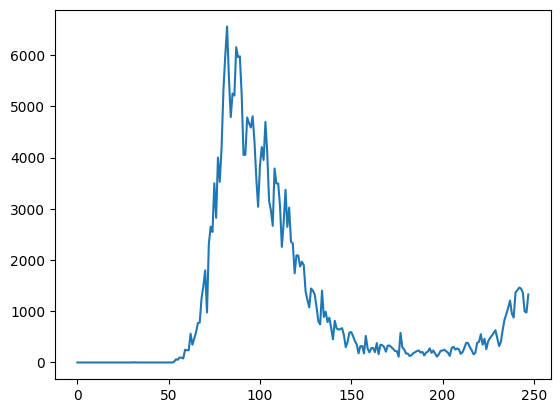

In [199]:
result_df.new_cases.plot()

#### While this plot shows the overall trend, it's hard to tell where the peak occured, as there are no dates on the X axis. We can use the `date` column as the index for the data frame to address this issue.

In [200]:
result_df.set_index('date', inplace=True)

In [201]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0,0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1,35473,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4,35477,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6,35483,54395.0,5214766.0,4459.995818,586.866146,86248.897403


<Axes: xlabel='date'>

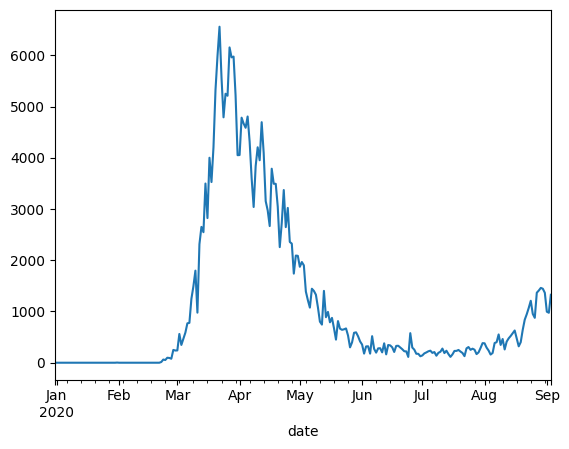

In [202]:
result_df.new_cases.plot()

#### Let's plot the new_cases & new_deaths per day as line graphs

<Axes: xlabel='date'>

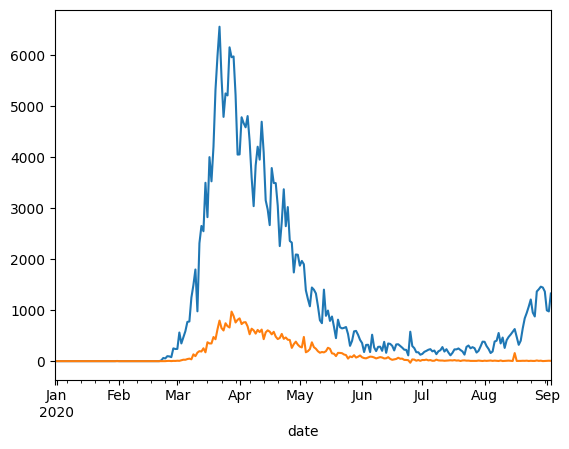

In [203]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

#### Let's see how the death rate and positive testing rate vary over time.
#### Also add the `title`

<Axes: title={'center': 'Death Rate'}, xlabel='date'>

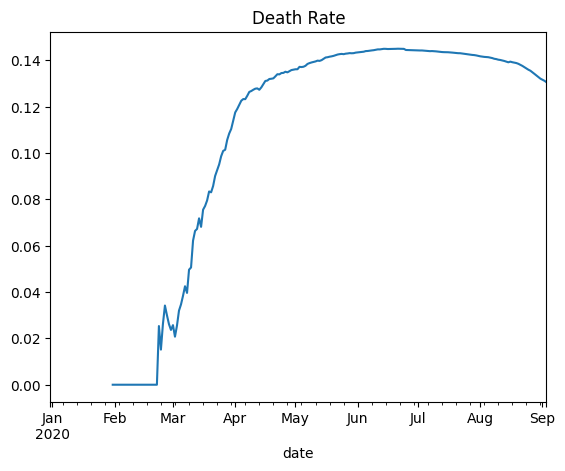

In [206]:
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate')

#### Positive rate

<Axes: title={'center': 'Positive rate'}, xlabel='date'>

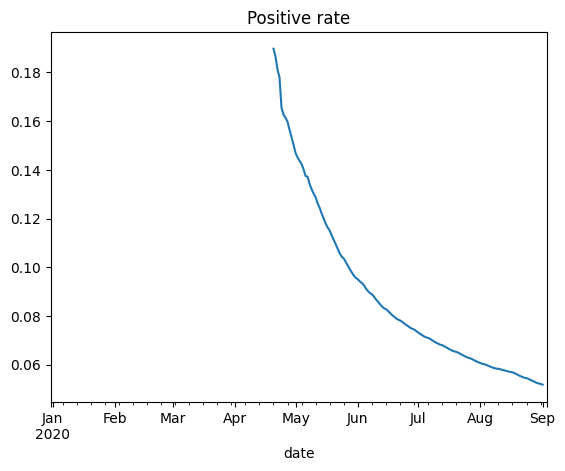

In [207]:
positive_rate = result_df.total_cases / result_df.total_tests
positive_rate.plot(title = 'Positive rate')

#### Let's plot some month-wise data using a bar chart to visulize the trend at higher level

In [209]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0,0.0
2,885.0,21,0.0
3,100851.0,11570,0.0
4,101852.0,16091,419591.0
5,29073.0,5658,1078720.0
6,8217.5,1404,830354.0
7,6722.0,388,797692.0
8,21060.0,345,1098704.0
9,3297.0,20,54395.0


<Axes: xlabel='month'>

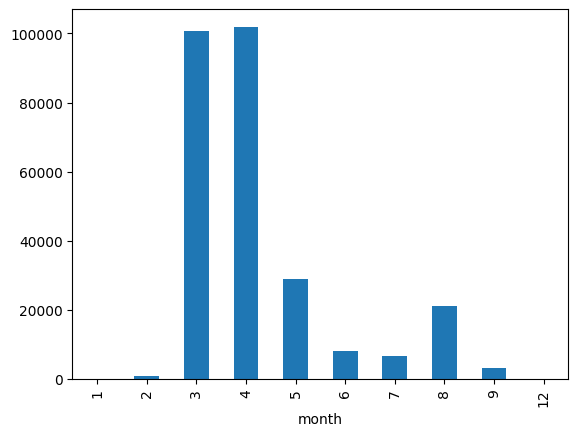

In [211]:
covid_month_df.new_cases.plot(kind='bar')

In [217]:
covid_df[covid_df.month == 4].new_cases.sum()

np.float64(101852.0)

<Axes: title={'center': 'New Tests'}, xlabel='month'>

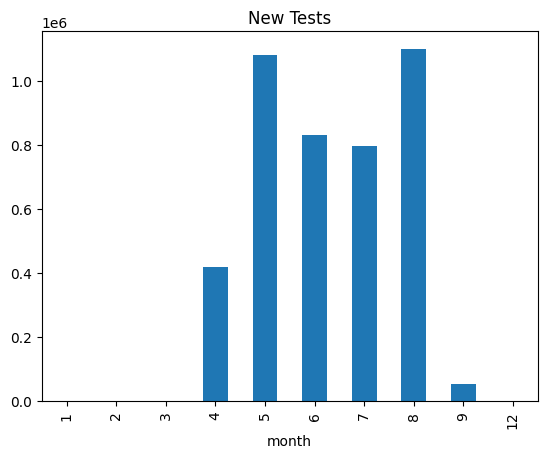

In [225]:
covid_month_df.new_tests.plot(kind='bar', title='New Tests')

<Axes: xlabel='month', ylabel='No of Deaths'>

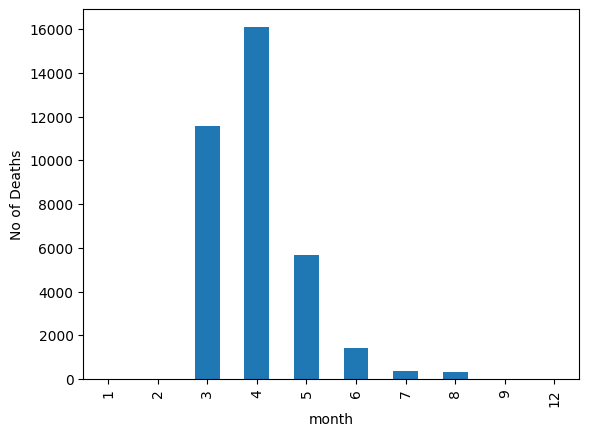

In [229]:
covid_month_df.new_deaths.plot(kind='bar', ylabel='No of Deaths')